<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Jamboree_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jamboree Business Case Study**

### Objective
#### Jamboree would like to understand the effect of new feature that they launched recently where students/learners can come to their website and check their probability of getting into the IVY league college. 

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

### Statistical Summary

In [ ]:
# Basic info of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Summary info of the dataset
data_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


##### **Observation:** *As the Mean and Median values of all the features are very closer, there doesn't seem to be any outliers*

In [ ]:
# Top 5 rows from the dataset
data_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Shape of the dataset
print("Jamboree dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Jamboree dataset contains 500 Rows and 9 Columns


In [ ]:
# Size of the dataset
data_df.size

4500

In [ ]:
# Columns/Features in the dataset
data_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Data Pre-Processing

In [ ]:
# Check for any missing values

def check_for_missingvalues():
  output = data_df.columns[data_df.isna().any()]

  if output.size > 0: 
    print("In the given dataset {0} has missing values \n".format(output[0]))
  else:
    print("This dataset doesn't have any missing values \n")

  print(data_df.isna().sum())

check_for_missingvalues()

This dataset doesn't have any missing values 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


##### **Observation:** *There is no missing value for any of the feature*

In [ ]:
# Check for any duplicates
duplicate_rows = data_df[data_df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


##### **Observation:** *There is no duplicate value for any of the feature*

In [4]:
# take ca copy of the dataset for further working
work_df = data_df.copy()

In [ ]:
work_df.shape

(500, 9)

In [ ]:
# Drop Serial No. column
work_df.drop(['Serial No.'], axis=1, inplace=True)

In [ ]:
work_df.shape

(500, 8)

Text(0.5, 1.0, 'Research Distribution')

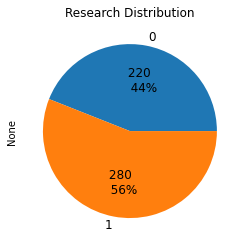

In [ ]:
def label_func(val):
  return f'{val/100 * len(work_df): .0f} \n {val: .0f}%'

work_df.groupby(['Research']).size().plot(kind='pie', autopct=label_func, textprops={'fontsize': 12})
plt.title("Research Distribution")

In [ ]:
# Segregating Numerical Featrues for future analysis
num_features = work_df.select_dtypes('number')
num_features.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

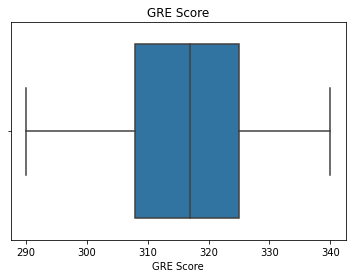

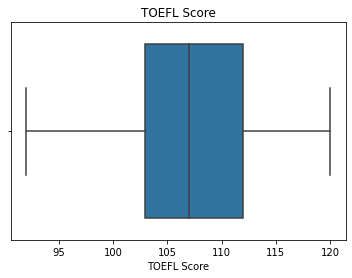

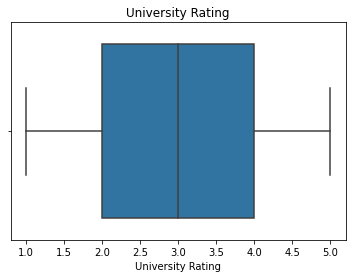

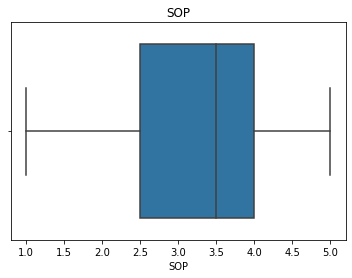

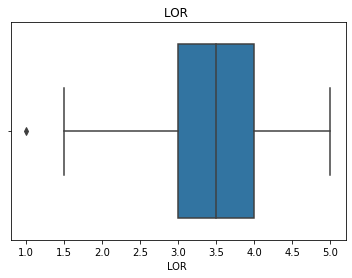

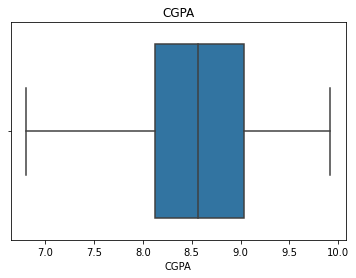

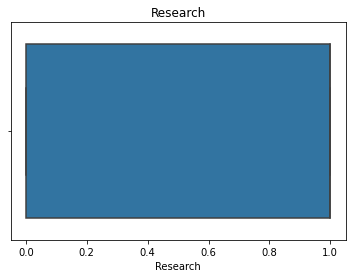

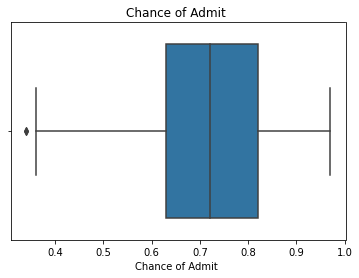

In [ ]:
# Check for outliers
for col in work_df.columns:
  p = sns.boxplot(data=work_df, x=col)
  p.set(title=f'{col}')
  plt.show()

In [13]:
# Calculate IQR for LOR
LOR_Q1 = work_df['LOR '].quantile(.25)
LOR_Q3 = work_df['LOR '].quantile(.75)
LOR_IQR = LOR_Q3 - LOR_Q1
LOR_IQR

1.0

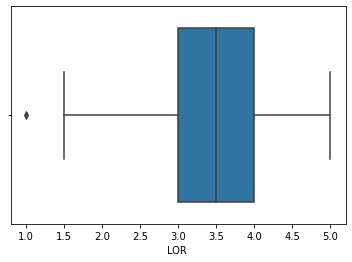

In [14]:
# Boxplot of LOR before removing the Outlier
sns.boxplot(data=work_df, x=work_df['LOR '])

In [16]:
# Removing outlier of LOR using IQR method
work_df = work_df[(work_df['LOR '] > LOR_Q1-1.5*LOR_IQR) & (work_df['LOR '] < LOR_Q3+1.5*LOR_IQR)]

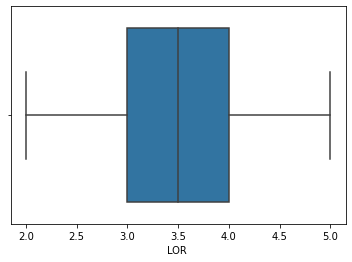

In [17]:
# Boxplot of LOR after removing the Outlier
sns.boxplot(data=work_df, x=work_df['LOR '])

In [20]:
# Calculate IQR for Chance of Admit
CoA_Q1 = work_df['Chance of Admit '].quantile(.25)
CoA_Q3 = work_df['Chance of Admit '].quantile(.75)
CoA_IQR = CoA_Q3 - CoA_Q1
CoA_IQR

0.18999999999999995

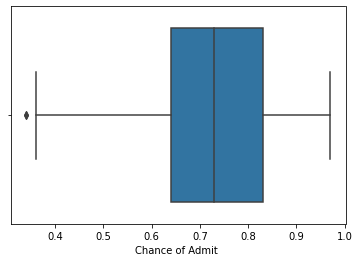

In [21]:
# Boxplot of Chance of Admit before removing the Outlier
sns.boxplot(data=work_df, x=work_df['Chance of Admit '])

In [22]:
# Removing outlier of Chance of Admit using IQR method
work_df = work_df[(work_df['Chance of Admit ']>CoA_Q1-1.5*CoA_IQR) & (work_df['Chance of Admit ']<CoA_Q3+1.5*CoA_IQR)]

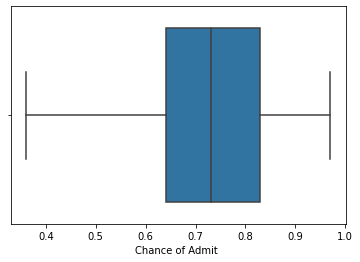

In [23]:
# Boxplot of Chance of Admit after removing the outlier
sns.boxplot(data=work_df, x=work_df['Chance of Admit '])

### Data Analysis

#### Non-Graphical Analysis